# Linear Regression
This notebook will first build a linear regression model from scratch, then implement it with the [IBMEmployeeAttrition](https://github.com/Madison-Bunting/INDE-577/blob/main/IBMEmployeeAttrition.csv) dataset.

In [224]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#sklearn imports
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [225]:
#importing the dataset as a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/IBMEmployeeAttrition.csv")

Below is the code for a linear regression model, from scratch

In [226]:
#Create a function to find the slope of the regression line
def Slope(a,b):
    n = len(a)
    dot_sum = np.sum(a*b)
    sumX = np.sum(a)
    sumY = np.sum(b)
    sumX2 = np.sum(a**2)
    slope = (n * dot_sum - sumX * sumY)/(n * sumX2 - sumX**2)
    return slope

In [227]:
#Create a function to find the intercept of the linear regression line
def Intercept(a,b):
    print(b)
    intercept = np.mean(b) - Slope(a,b) * np.mean(a)
    return intercept

In [228]:
#Create a function to make predictions using the linear regression algorithm
def Prediction(slope, x_input, intercept):
    predict = slope * x_input + intercept
    return predict

In [229]:
#Create a function to find R-squared, which is the regression metric
def R_squared(predicted_values, test_values):
    f = predicted_values
    y = test_values
    print(f,'\n\n', y)
    sum_sq = np.sum((y - np.mean(y))**2) #equation for sum of squares
    sum_reg = np.sum((f - np.mean(y))**2) #equation for regression sum
    sum_res = np.sum((y - f)**2) #equation for residuals sum of squares
    R_2 = 1 - (sum_res/sum_sq) #equation for R-squared
    return R_2    

In [230]:
#Create a function to find the correlation coefficient for given x and y values
def Correlation_coeff(predicted_values, test_values):
    a = predicted_values
    b = test_values
    n = len(a)
    dot_sum = np.sum(a*b)
    sumX = np.sum(a)
    sumY = np.sum(b)
    sumX2 = np.sum(a**2)
    sumY2 = np.sum(b**2)
    score = (n * dot_sum - sumX * sumY) / np.sqrt((n * sumX2 - (sumX)**2)*(n * sumY2 - (sumY)**2))
    return score

In [231]:
#Create a function to find the covariance for given x and y values
def Covariance(X,Y):
    a = X
    b = Y
    n = len(a)
    dot_sum = np.sum(a*b)
    cov = dot_sum / n - np.mean(a) * np.mean(b)
    return cov

## Pre-Processing
Before we can run linear regression, we need to pre-process the data and encode labels. We will do this using sklearn's preprocessing package.

In [232]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df)

# Implementation
We will now utilize the functions created above to evaluate the imported dataset For [IBMEmployeeAttrition](https://github.com/Madison-Bunting/INDE-577/blob/main/IBMEmployeeAttrition.csv) specifically, there are lots of variables on which one could run a regression.

In [233]:
#Getting a sense of the dimensions of the data in preparation for making predictions with it
X = encoded_df['JobLevel']
y = encoded_df['MonthlyIncome']

In [234]:
#Divide the data into test and training sets
test_size = 0.10
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=seed)

In [235]:
#Find the intercept of the regression line using the functions created previously
intercept = Intercept(X_train,y_train)
slope = Slope(X_train,y_train)
print(intercept,slope)

predictions = Prediction(slope = slope,x_input = X_test, intercept = intercept)
print(predictions)
print("R-squared:", R_squared(predicted_values = predictions, test_values = y_test))
print("Correlation Coefficient:", Correlation_coeff(test_values = y_test, predicted_values = predictions))

484      5460
738     12742
369      2657
1276     4189
462      5337
        ...  
211      8474
502      8381
537      8793
1220     4502
175      4257
Name: MonthlyIncome, Length: 1323, dtype: int64
-1862.3122725474595 4057.04928394613
71       2194.737011
259      2194.737011
363      2194.737011
185      2194.737011
1015     2194.737011
            ...     
24       2194.737011
110     10308.835579
15      10308.835579
146      2194.737011
1016     2194.737011
Name: JobLevel, Length: 147, dtype: float64
71       2194.737011
259      2194.737011
363      2194.737011
185      2194.737011
1015     2194.737011
            ...     
24       2194.737011
110     10308.835579
15      10308.835579
146      2194.737011
1016     2194.737011
Name: JobLevel, Length: 147, dtype: float64 

 71      2703
259     3479
363     2851
185     2756
1015    2996
        ... 
24      2960
110     7484
15      9980
146     2720
1016    1261
Name: MonthlyIncome, Length: 147, dtype: int64
R-squared: 0.87749

In [236]:
#Equation for linear regression
y_est = slope * X + intercept

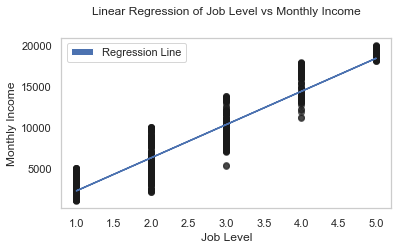

In [237]:
#Plot the linear regression function
plt.scatter(X,y,color='k',alpha=0.55)
plt.plot(X,y_est)
blue_patch = mpatches.Patch(label='Regression Line')
plt.legend(loc=0,handles=[blue_patch])
plt.title('Linear Regression of Job Level vs Monthly Income', y=1.1)
plt.ylabel('Monthly Income')
plt.xlabel('Job Level')
plt.tight_layout(pad=2)
plt.grid(False)
plt.show()

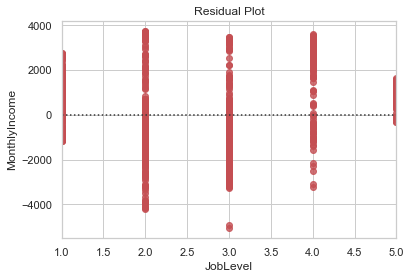

In [238]:
#Residual plot
sns.set(style="whitegrid")
sns.residplot(X, y, lowess=True, color="r")
plt.title('Residual Plot')
plt.show()